In [11]:
import torch
from torch.distributions import Normal
import matplotlib.pyplot as plt
import numpy as np
import unittest

In [13]:
from math import gamma
# Util functions

def gaussian_distribution_density_data(mu, sigma):
    """
    Given a mu and a sigma, this function returns a tuple
    representing the X and Y of the PDF
    Parameters
    ----------
    mu : int, required
        Distribution median
    sigma: int, required
        Standard deviation
    Returns
    -------
    data, gaussian_distribution
        a list of strings used that are the header columns
    """
    data = torch.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
    gaussian_distribution = (1/(sigma * torch.sqrt(torch.tensor(2) * torch.pi))) * torch.exp(-0.5 * ((data - mu) / sigma)**2)
    return data, gaussian_distribution

def plot(X, mu1, sigma1, mu2, sigma2, title=''):
    """
    Plots two gaussian distributions
    Parameters
    ----------
    X: list, required
        List of integers, contains all data to display
    mu1 : int, required
        First distribution median
    sigma1: int, required
        First standard deviation
    mu2 : int, required
        Second distribution median
    sigma2: int, required
        Second standard deviation
    title: str, optional
        Title to show in plot visualization
    """
    # a) Scatter Plot with histograms
    # Histograms
    plt.hist(X, bins=50, alpha=0.25, density = True, histtype='bar', ec='black')
    # Scatter
    plt.scatter(X,torch.zeros(len(X)))
    # Density
    x1, gaussian_density_1 = gaussian_distribution_density_data(mu1, sigma1)
    x2, gaussian_density_2 = gaussian_distribution_density_data(mu2, sigma2)
    plt.plot(x1, gaussian_density_1, label=f'Gaussian (mu={mu1}, sigma={sigma1})', color='red')
    plt.plot(x2, gaussian_density_2, label=f'Gaussian (mu={mu2}, sigma={sigma2})', color='blue')
    if len(title):
        plt.title(title)
    plt.legend()
    plt.show()

# Trabajo Práctico 0: Algoritmo de Maximización de la Esperanza

X =  tensor([ 3.6484,  3.3643,  8.3759,  5.6028,  4.2552,  2.9922,  9.2684,  1.4252,
        11.6568,  7.8896,  5.8228,  5.9159,  8.9537, 10.8403,  5.7170,  0.9355,
         4.0876,  8.0999,  8.3720, 15.6196, 22.8130, 24.1579, 24.2552, 24.8711,
        23.5446, 25.3336, 23.9134, 25.8819, 24.2255, 23.8613, 25.3465, 23.5008,
        26.1199, 27.1287, 22.5677, 22.0770, 26.3815, 23.2758, 27.2555, 26.4332])


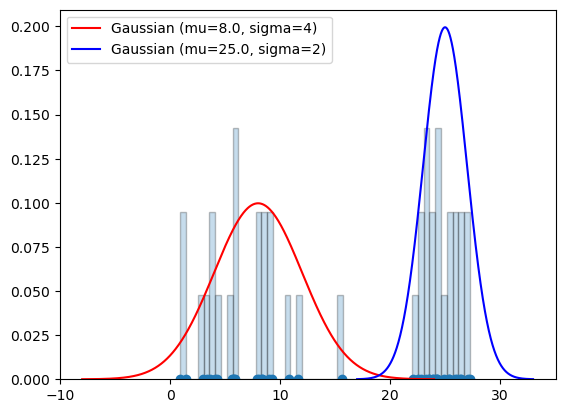

In [16]:
n = 20
mu1 = 8.0
sigma1 = 4
mu2 = 25.0
sigma2 = 2

# 1)
# Generates data that follows two gaussian distributions based on a set of parameters.
def generate_data(n, mu1, sigma1, mu2, sigma2):
  """
  Generates merged data from two gaussian distribution
  based on parameters
  Parameters
  ----------
  n: int, required
      Dimention of output data
  mu1 : int, required
      First distribution median
  sigma1: int, required
      First standard deviation
  mu2 : int, required
      Second distribution median
  sigma2: int, required
      Second standard deviation
  Returns
  -------
  Data
      A tensor data with contcatenation of 2
      gaussian distributions
  """
  # Generate distributions
  normal_dist1 = torch.distributions.Normal(torch.tensor([mu1]), torch.tensor([sigma1]))
  normal_dist2 = torch.distributions.Normal(torch.tensor([mu2]), torch.tensor([sigma2]))

  # Take a sample from each dist
  gaussian_sample1 = normal_dist1.sample((n,1)).squeeze()
  gaussian_sample2 = normal_dist2.sample((n,1)).squeeze()

  # Concatenate the 2 samples
  X =  torch.cat((gaussian_sample1, gaussian_sample2))
  return X

X = generate_data(n, mu1, sigma1, mu2, sigma2)
print('X = ', X)

plot(X, mu1, sigma1, mu2, sigma2)



In [19]:
# 2)
def init_random_parameters(k=2, range=50):
  """
  Generates K set of random parameters of mu and sigma
  Parameters
  ----------
  K: int, required
      Number of set of parameters
  range : int, optional
      Maximum value a parameter could take
  Returns
  -------
  Matrix
      A Kx2 matrix of mu and sigma parameters
  """
  return torch.rand((k, 2))*range

P = init_random_parameters()
print('P = ', P)

P =  tensor([[26.3149, 44.2571],
        [ 7.1662, 27.5714]])


In [24]:
# 3)
def calculate_log_likelihood_gaussian_observation(x_n, mu_k, sigma_k):
  """
  Calculates likelihood for gaussian distribution
  Parameters
  ----------
  x_n: tensor, required
      Gaussian observation data
  mu_k : int, required
      Distribution median
  sigma_k : int, required
      Standard deviation
  Returns
  -------
  Matrix
      A Kx2 matrix of mu and sigma parameters
  """
  return -(1 / 2) * torch.log(torch.tensor(2 * torch.pi)) - 1 * torch.log(torch.tensor(sigma_k)) - (1 / (2 * sigma_k**2)) * torch.sum((x_n - mu_k) ** 2)

likelihood_test = calculate_log_likelihood_gaussian_observation(X[0], mu1, sigma1)
print('likelihood_test = ', likelihood_test)

class LikelihoodGuassianUnitTest(unittest.TestCase):

    def test_likelihood_lower_real(self):
      test_data = torch.distributions.Normal(torch.tensor([4.0]), torch.tensor([8.0]))
      test_gaussian_sample = torch.tensor(test_data.sample((30,1)).squeeze())

      real_lgo = calculate_log_likelihood_gaussian_observation(test_gaussian_sample, 4.0, 8.0)
      false_lgo = calculate_log_likelihood_gaussian_observation(test_gaussian_sample, 40.0, 7.0)
      self.assertTrue(abs(real_lgo) < abs(false_lgo))

    def test_likelihood_value(self):
      test_gaussian_sample = torch.tensor([0.34, 0.45, 0.78])
      likelihood = calculate_log_likelihood_gaussian_observation(test_gaussian_sample, 4.0, 8.0)
      self.assertAlmostEquals(float(likelihood), -3.2824, 3      self.assertFalse(False))

unittest.main(argv=[''], verbosity=2, exit=False)

test_likelihood_lower_real (__main__.LikelihoodGuassianUnitTest.test_likelihood_lower_real) ... /tmp/ipykernel_115400/1105068272.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_gaussian_sample = torch.tensor(test_data.sample((30,1)).squeeze())
ok
test_likelihood_value (__main__.LikelihoodGuassianUnitTest.test_likelihood_value) ... /tmp/ipykernel_115400/1105068272.py:36: DeprecationWarning: Please use assertAlmostEqual instead.
  self.assertAlmostEquals(float(likelihood), -3.2824, 3)
ok
test_likelihood_lower_real (__main__.MembershipDatasetUnitTest.test_likelihood_lower_real) ... /tmp/ipykernel_115400/937653967.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_gaussian_s

likelihood_test =  tensor(-2.8970)


In [130]:
# 4)
def calculate_membership_dataset(X_dataset, Parameters_matrix):
  """
  Calculates membership of elements in X_dataset for each cluster K,
  where Parameters_matrix dimension is Kx2
  Parameters
  ----------
  X_dataset: tensor, required
      Data to determine membership
  Parameters_matrixk : tensor, required
      K set of parameters of mu and sigma
  Returns
  -------
  Matrix
      Membership matrix
  """
  N = len(X_dataset)
  K = Parameters_matrix.shape[0]
  M = torch.zeros(N, K)

  # for each element in X, calculate its likelyhood with each set of parameters from the Parameter Matrix and store the maximum
  for x in range(N):
    # set max likelyhood initially as a very low number (Me suena que esto también podría ponerse de una mejor forma)
    x_max_likelyhood = -np.inf
    k_membership = np.inf
    # iterate over the parameter sets to find which set achieves max likelihood over x
    for k_index, parameters in enumerate(Parameters_matrix):
      x_likelyhood = calculate_log_likelihood_gaussian_observation(X_dataset[x].clone(), parameters[0], parameters[1])
      if x_likelyhood > x_max_likelyhood:
        x_max_likelyhood = x_likelyhood
        k_membership = k_index
    if k_membership != np.inf:
      M[x][k_membership] = 1
    else:
      return None

  return M

#M = calculate_membership_dataset(X, P)
#print('M = ', M)

class MembershipDatasetUnitTest(unittest.TestCase):

    def test_calculate_membership_all_k0(self):
      parameters = torch.tensor([[8.5, 4.5], [0.0, 0.0]])
      dataset = torch.distributions.Normal(torch.tensor([8.0]), torch.tensor([4.0]))
      membership = calculate_membership_dataset(dataset.sample((10,1)).squeeze().clone(), parameters)
      expected = torch.tensor([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]])
      self.assertTrue(torch.equal(expected, membership))

    def test_calculate_membership_all_k1(self):
      parameters = torch.tensor([[0.0, 0.0], [8.5, 4.5]])
      dataset = torch.distributions.Normal(torch.tensor([8.0]), torch.tensor([4.0]))
      membership = calculate_membership_dataset(dataset.sample((10,1)).squeeze().clone(), parameters)
      expected = torch.tensor([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]])
      self.assertTrue(torch.equal(expected, membership))

    def test_calculate_membership_none(self):
      parameters = torch.tensor([[0.0, 0.0], [0.0, 0.0]])
      dataset = torch.distributions.Normal(torch.tensor([8.0]), torch.tensor([4.0]))
      membership = calculate_membership_dataset(dataset.sample((10,1)).squeeze().clone(), parameters)
      self.assertEqual(membership, None)

    def test_calculate_membership_mix_k(self):
      parameters = torch.tensor([[4.0, 2.0], [8.5, 4.5]])
      dataset = torch.tensor([6.6723, 8.7814, 6.9761, 6.2105, 8.9335])
      membership = calculate_membership_dataset(dataset.clone(), parameters)
      expected = torch.tensor([
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.]])
      self.assertTrue(torch.equal(expected, membership))

unittest.main(argv=[''], verbosity=2, exit=False)

test_likelihood_lower_real (__main__.LikelihoodGuassianUnitTest.test_likelihood_lower_real) ... /tmp/ipykernel_115400/1105068272.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_gaussian_sample = torch.tensor(test_data.sample((30,1)).squeeze())
ok
test_likelihood_value (__main__.LikelihoodGuassianUnitTest.test_likelihood_value) ... /tmp/ipykernel_115400/1105068272.py:36: DeprecationWarning: Please use assertAlmostEqual instead.
  self.assertAlmostEquals(float(likelihood), -3.2824, 3)
ok
test_calculate_membership_all_k0 (__main__.MembershipDatasetUnitTest.test_calculate_membership_all_k0) ... /tmp/ipykernel_115400/1105068272.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  re

In [27]:
#5)

def recalculate_parameters(X_dataset, Membership_data):
    """
    Recalculates parameters mu and sigma for each membership
    Parameters
    ----------
    X_dataset: tensor, required
        Data to determine membership
    Membership_data : tensor, required
        Indicates for each element in X_dataset its membership
        to some K cluster
    Returns
    -------
    Matrix
        Kx2 set of parameters mu and sigma for k clusters
    """
    # TODO: Can we improve this to use torch?
    membership_k1 = Membership_data[:,0]
    membership_k2 = Membership_data[:,1]
    k1_tentative_values = torch.tensor([x for index, x in enumerate(X_dataset) if membership_k1[index] == 1])
    k2_tentative_values = torch.tensor([x for index, x in enumerate(X_dataset) if membership_k2[index] == 1])
    mu_1 = torch.mean(k1_tentative_values)
    mu_2 = torch.mean(k2_tentative_values)
    sigma_1 = torch.std(k1_tentative_values)
    sigma_2 = torch.std(k2_tentative_values)
    return torch.tensor([[mu_1, sigma_1],[mu_2, sigma_2]])

print('Real parameters k1=[{},{}], k2=[{},{}] '.format(mu1, sigma1, mu2, sigma2))
print('Old P parameters: ', P)
P = recalculate_parameters(X, M)
print('New P parameters: ', P)

Real parameters k1=[8.0,4], k2=[25.0,2] 
Old P parameters:  tensor([[    nan,     nan],
        [15.6447,  9.5267]])
New P parameters:  tensor([[    nan,     nan],
        [15.6447,  9.5267]])


/tmp/ipykernel_115400/3349967677.py:25: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1760.)
  sigma_1 = torch.std(k1_tentative_values)


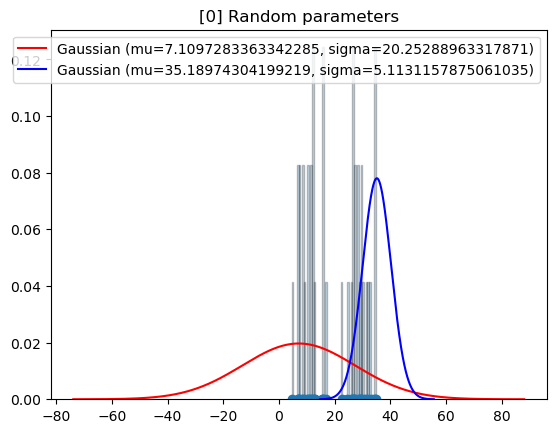

/tmp/ipykernel_115400/1105068272.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return -(1 / 2) * torch.log(torch.tensor(2 * torch.pi)) - 1 * torch.log(torch.tensor(sigma_k)) - (1 / (2 * sigma_k**2)) * torch.sum((x_n - mu_k) ** 2)


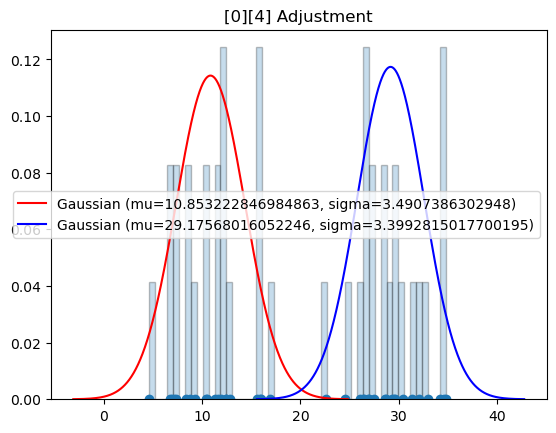

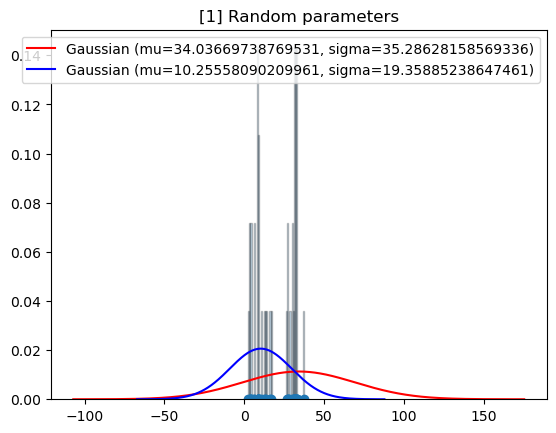

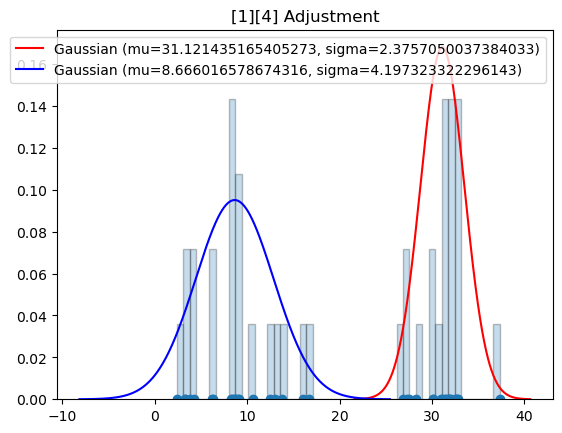

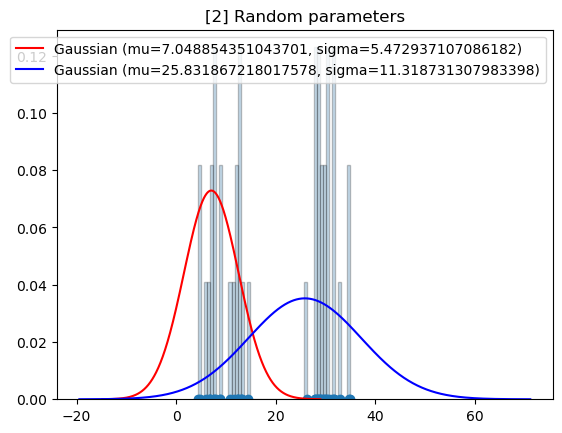

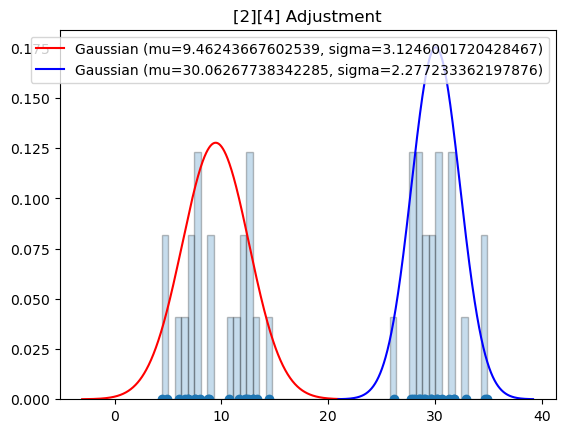

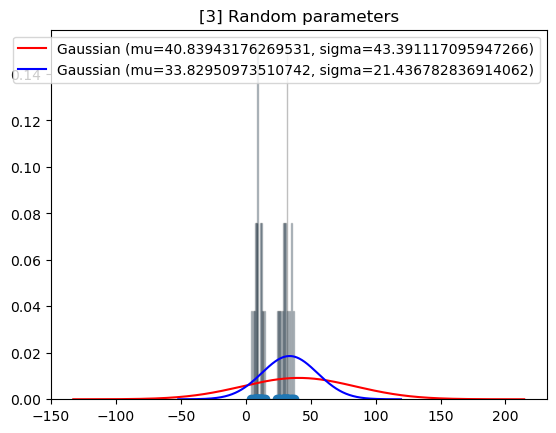

/tmp/ipykernel_115400/3349967677.py:25: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1760.)
  sigma_1 = torch.std(k1_tentative_values)


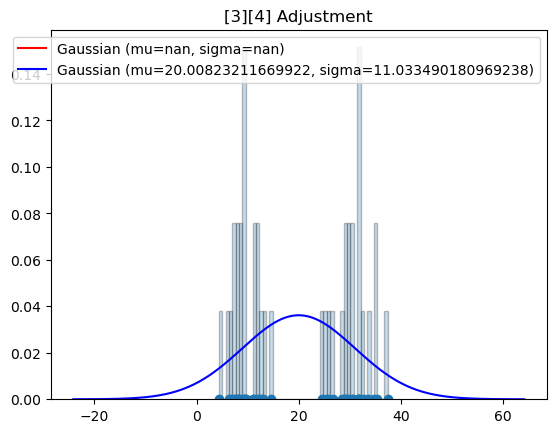

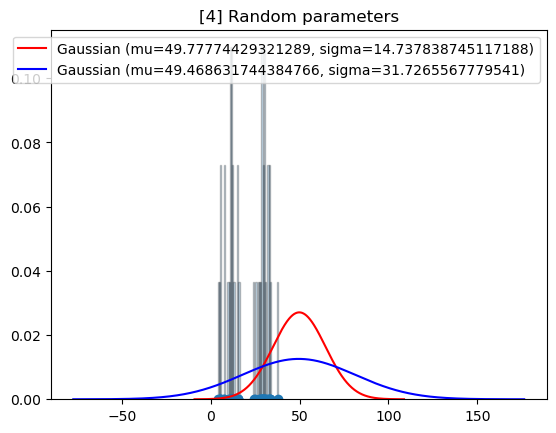

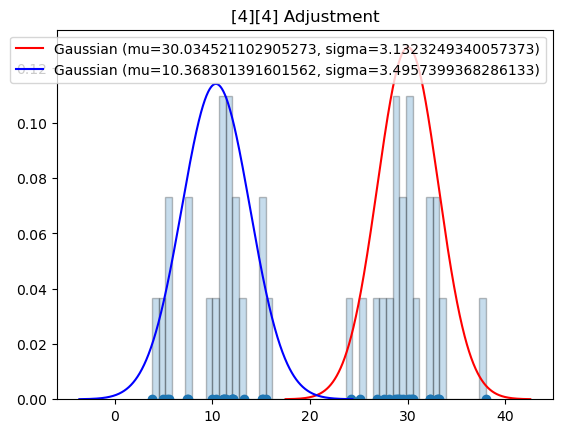

In [28]:
i_max = 5
i_adj_max = 5

mu1 = 10.0
sigma1 = 3.6
mu2 = 30.0
sigma2 = 2.6

for i in range(i_max):
    X = generate_data(n, mu1, sigma1, mu2, sigma2)
    P = init_random_parameters()
    plot(X, P[0][0], P[0][1], P[1][0], P[1][1], '[{}] Random parameters'.format(i))

    for a in range(i_adj_max):
        M = calculate_membership_dataset(X, P)

        #print('[', i,'] Old P parameters: ', P)
        P = recalculate_parameters(X, M)
        #print('[', i,'] New P parameters: ', P, '\n')
    plot(X, P[0][0], P[0][1], P[1][0], P[1][1], '[{}][{}] Adjustment'.format(i, a))

In [30]:
# 7)
def random_parameters_heuristic(X):
    """
    Generates K=2 set of parameters mu and sigma for gaussian
    distribution based on heursitic
    Parameters
    ----------
    X: tensor, required
        Gaussian distribution data
    Returns
    -------
    Matrix
        Kx2 set of parameters mu and sigma for K=2 clusters
    """
    mu = torch.mean(X, dim=0)
    sigma = torch.std(X, dim=0)
    mu_below = mu - sigma
    mu_above = mu + sigma
    mu1 = (mu - mu_below) * torch.rand(1) + mu_below
    sigma1 = (sigma / 2 - sigma / 4) * torch.rand(1) + sigma / 4
    mu2 = (mu_above - mu) * torch.rand(1) + mu
    sigma2 = (sigma / 2 - sigma / 4) * torch.rand(1) + sigma / 4
    return torch.tensor([[mu1, sigma1], [mu2, sigma2]])



PI = random_parameters_heuristic(X)
print(PI)

tensor([[12.3142,  4.2855],
        [22.2562,  3.6726]])


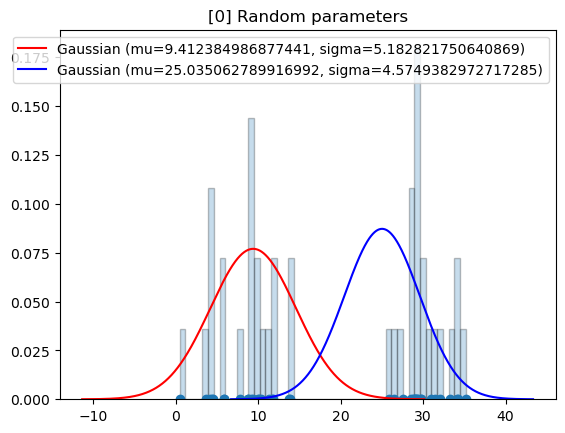

/tmp/ipykernel_115400/1105068272.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return -(1 / 2) * torch.log(torch.tensor(2 * torch.pi)) - 1 * torch.log(torch.tensor(sigma_k)) - (1 / (2 * sigma_k**2)) * torch.sum((x_n - mu_k) ** 2)


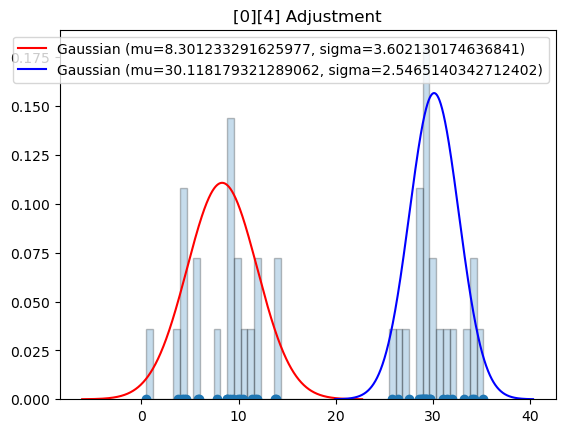

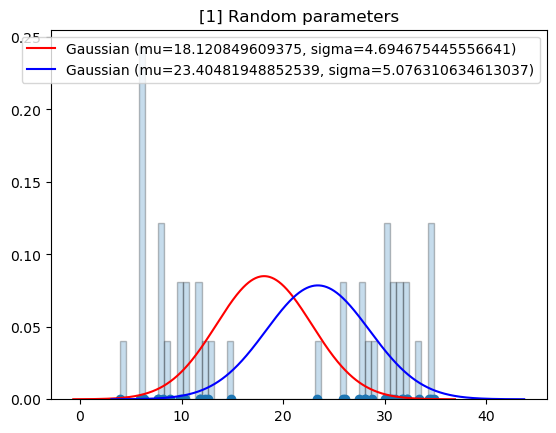

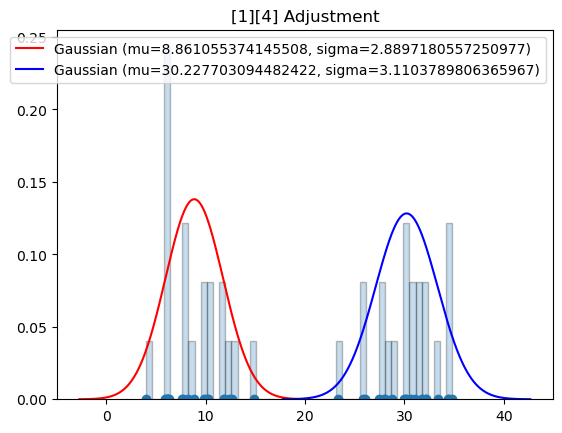

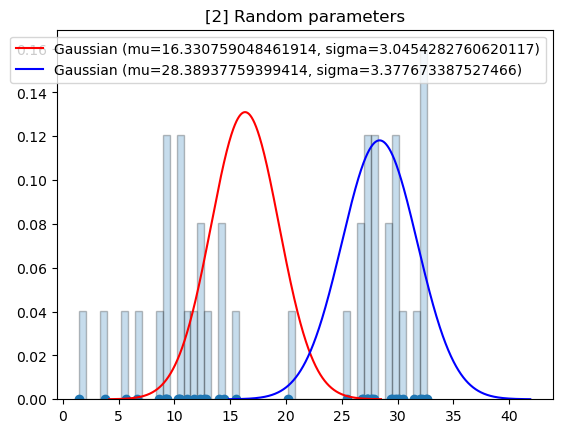

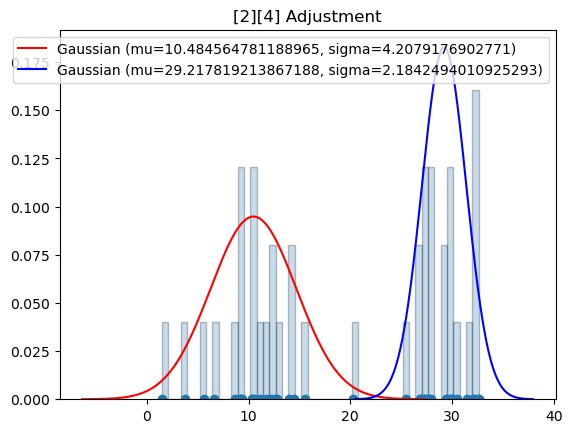

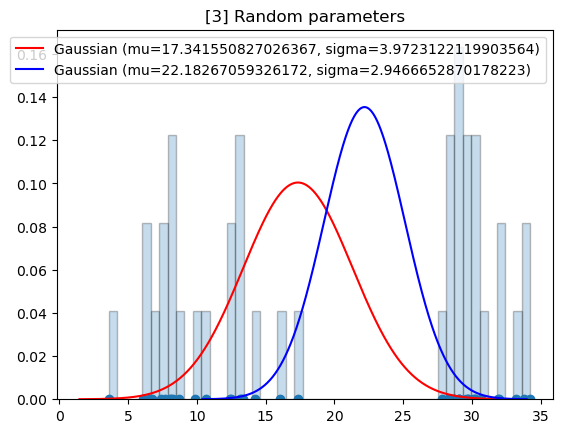

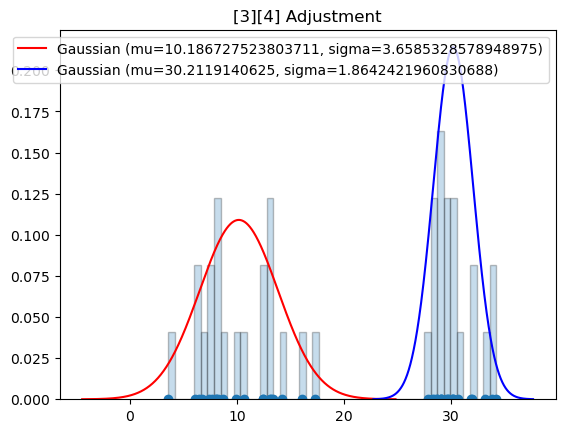

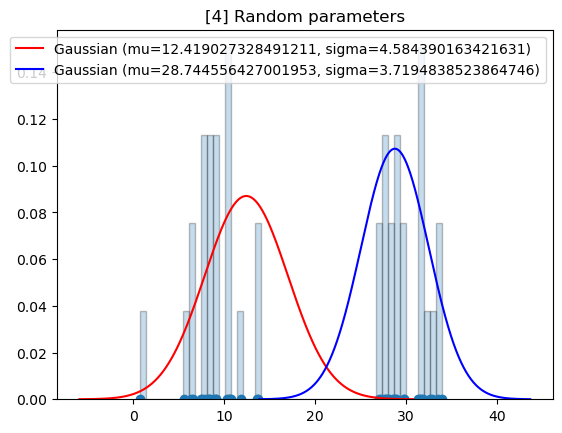

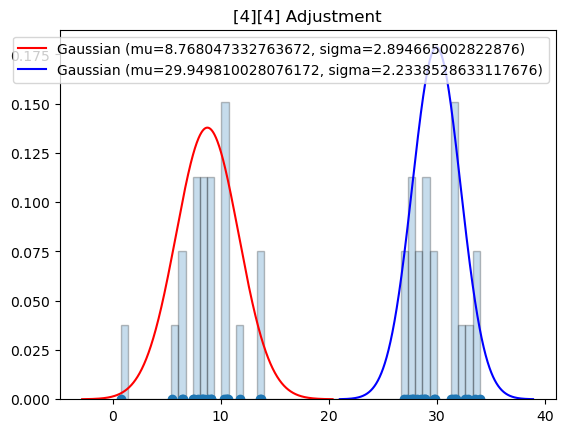

In [31]:
i_max = 5
i_adj_max = 5

mu1 = 10.0
sigma1 = 3.6
mu2 = 30.0
sigma2 = 2.6

for i in range(i_max):
    X = generate_data(n, mu1, sigma1, mu2, sigma2)
    P = random_parameters_heuristic(X)
    plot(X, P[0][0], P[0][1], P[1][0], P[1][1], '[{}] Random parameters'.format(i))

    for a in range(i_adj_max):
        M = calculate_membership_dataset(X, P)

        #print('[', i,'] Old P parameters: ', P)
        P = recalculate_parameters(X, M)
        #print('[', i,'] New P parameters: ', P, '\n')
    plot(X, P[0][0], P[0][1], P[1][0], P[1][1], '[{}][{}] Adjustment'.format(i, a))

# Algoritmo de Maximización de la Esperanza con datos artificiales (modelo Gamma)

In [32]:
# Util funcitons

def gamma_distribution_density_data(k, theta):
    """
    Given a k and a theta, this function returns a tuple
    representing the X and Y of the PDF
    Parameters
    ----------
    k: int, required
        Number of clusters
    theta: int, required
        Theta gamma parameter
    Returns
    -------
    Tensor
        Data for gamma distribution based on gamma
        parameters
    """
    data = torch.linspace(k - 4*theta, k + 4*theta, 1000)
    gamma_distribution = ( (1/(gamma(k)*(theta**k))) * (data**(k-1)) * (torch.exp(-1 * data/theta)) )
    return data, gamma_distribution

def plot_gamma(X, k1, theta1, k2, theta2, title=''):
    """
    Plots data and 2 gamma distributions
    Parameters
    ----------
    X: tensor, required
        Data to plot
    k1: int, required
        First k gamma distribution parameter
    theta1: int, required
        First theta gamma distribution parameter
    k2: int, required
        Second k gamma distribution parameter
    theta2: int, required
        Second theta gamma distribution parameter
    """
    # a) Scatter Plot with histograms
    # Histograms
    plt.hist(X, bins=50, alpha=0.25, density = True, histtype='bar', ec='black')
    # Scatter
    plt.scatter(X,torch.zeros(len(X)))
    # DensityS
    x1, gamma_density_1 = gamma_distribution_density_data(k1, theta1)
    x2, gamma_density_2 = gamma_distribution_density_data(k2, theta2)
    plt.plot(x1, gamma_density_1, label=f'Gamma (k={k1}, theta={theta1})', color='red')
    plt.plot(x2, gamma_density_2, label=f'Gamma (k={k2}, theta={theta2})', color='blue')
    plt.ylim(0, 2)
    plt.xlim(0,torch.max(X))
    if len(title):
        plt.title(title)
    plt.legend()
    plt.show()

X =  tensor([8.2679e-01, 3.9450e-03, 1.0245e-03, 2.3175e-03, 1.4899e-01, 1.6402e-01,
        1.0081e-02, 8.1691e-02, 3.8273e-02, 4.6644e-02, 1.8249e-01, 1.1660e-02,
        3.0107e-02, 1.1949e+00, 4.3528e-01, 1.2469e-01, 6.8305e-02, 1.1519e-01,
        7.8332e-01, 1.6036e-03, 3.9081e-01, 3.2979e-01, 2.0391e-02, 6.3743e-01,
        5.0498e-01, 1.0765e+00, 3.4024e-01, 3.3223e-01, 5.9161e-02, 1.9948e-01,
        6.1836e-01, 4.0512e-01, 1.0050e+00, 4.1662e-01, 2.4047e-01, 1.2184e+00,
        9.9269e-01, 9.3698e-01, 9.2051e-01, 9.0073e-01])


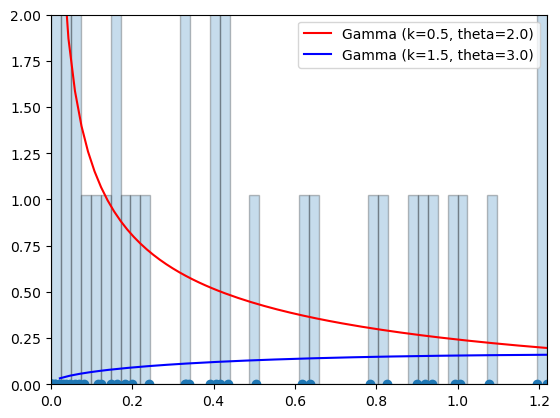

In [35]:
# 2)
k1 = .5
theta1 = 2.0
k2 = 1.5
theta2 = 3.0
# Generates data that follows two gamma distributions based on a set of parameters.
# parameters:
#    * k: shape
#    * theta:  scale
def generate_gamma_data(n, k1, theta1, k2, theta2):
  """
  Generates 2*n number of data combination from two gamma distributions
  Parameters
  ----------
  n: int, required
      Number of elements to generate for each gamma distribution
  k1: int, required
      First k gamma distribution parameter
  theta1: int, required
      First theta gamma distribution parameter
  k2: int, required
      Second k gamma distribution parameter
  theta2: int, required
      Second theta gamma distribution parameter
  Returns
  -------
  Tensor
      Generated data of length of 2*n
  """
  # Generate distributions
  gamma_dist1 = torch.distributions.Gamma(torch.tensor([k1]), torch.tensor([theta1]))
  gamma_dist2 = torch.distributions.Gamma(torch.tensor([k2]), torch.tensor([theta2]))

  # Take a sample from each dist
  gamma_sample1 = gamma_dist1.sample((n,1)).squeeze()
  gamma_sample2 = gamma_dist2.sample((n,1)).squeeze()

  # Concatenate the 2 samples
  X =  torch.cat((gamma_sample1, gamma_sample2))
  return X

X = generate_gamma_data(n, k1, theta1, k2, theta2)
print('X = ', X)

plot_gamma(X, k1, theta1, k2, theta2)


In [36]:
def calculate_log_likelihood_gamma_observation(x_n, k_n, theta_n):
    """
    Given a k, a theta, and an x observation this function returns the
    logarithmic likelyhood that said x belongs to the gamma distribution
    that results from that k and theta.
    Parameters
    ----------
    x_n: tensor, required
        Gamma distribution data
    k_n: int, required
        k gamma distribution parameter
    theta_n: int, required
        Theta gamma distribution parameter
    Returns
    -------
    Tensor
        Likelihood
    """
    # logarithmic gamma distribution.
    if x_n > 0:
      a = -1*(k_n*torch.log(torch.tensor(gamma(k_n)*theta_n)))
      b = (k_n-1)*torch.log(x_n)
      c = -1*x_n/theta_n
      likelihood = a + b + c
    else:
      likelihood = 0

    return likelihood

In [38]:
# 2)
def init_random_parameters(k=2, range=5):
  """
  Generates K set of random parameters of k and theta
  Parameters
  ----------
  K: int, required
      Number of set of parameters
  range : int, optional
      Maximum value a parameter could take
  Returns
  -------
  Matrix
      A Kx2 matrix of k and theta parameters
  """
  return torch.rand((k, 2))*range

P = init_random_parameters()
print('P = ', P)

def calculate_membership_dataset_gamma(X_dataset, Parameters_matrix):
  """
  Calculates membership of elements in X_dataset for each cluster K,
  where Parameters_matrix dimension is Kx2
  Parameters
  ----------
  X_dataset: tensor, required
      Data to determine membership
  Parameters_matrixk : tensor, required
      K set of parameters of k and theta
  Returns
  -------
  Matrix
      Membership matrix
  """
  N = len(X_dataset)
  K = Parameters_matrix.shape[0]
  M = torch.zeros(N, K)

  # for each element in X, calculate its likelyhood with each set of parameters from the Parameter Matrix and store the maximum
  for x in range(N):
    # set max likelyhood initially as a very low number (Me suena que esto también podría ponerse de una mejor forma)
    x_max_likelyhood = -999999999
    k_membership = 0
    # iterate over the parameter sets to find which set achieves max likelihood over x
    for k_index, parameters in enumerate(Parameters_matrix):
      x_likelyhood = calculate_log_likelihood_gamma_observation(X_dataset[x], parameters[0], parameters[1])
      if x_likelyhood > x_max_likelyhood:
        x_max_likelyhood = x_likelyhood
        k_membership = k_index
    M[x][k_membership] = 1

  return M

M = calculate_membership_dataset(X, P)
print('M = ', M)

P =  tensor([[0.0305, 2.2478],
        [3.2698, 2.9701]])
M =  tensor([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]])


/tmp/ipykernel_115400/1105068272.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return -(1 / 2) * torch.log(torch.tensor(2 * torch.pi)) - 1 * torch.log(torch.tensor(sigma_k)) - (1 / (2 * sigma_k**2)) * torch.sum((x_n - mu_k) ** 2)


In [40]:
def recalculate_parameters_gamma(X_dataset, Membership_data):
    """
    Recalculates parameters k=2 and theta for each membership
    Parameters
    ----------
    X_dataset: tensor, required
        Data to determine membership
    Membership_data : tensor, required
        Indicates for each element in X_dataset its membership
        to some K cluster
    Returns
    -------
    Matrix
        Kx2 set of parameters k and theta for k=2 clusters
    """
    # TODO: Can we improve this to use torch?
    membership_k1 = Membership_data[:,0]
    membership_k2 = Membership_data[:,1]
    k1_tentative_values = torch.tensor([x for index, x in enumerate(X_dataset) if membership_k1[index] == 1])
    k2_tentative_values = torch.tensor([x for index, x in enumerate(X_dataset) if membership_k2[index] == 1])
    k_1 = torch.mean(k1_tentative_values)**2 / torch.var(k1_tentative_values)
    k_2 = torch.mean(k2_tentative_values)**2 / torch.var(k2_tentative_values)
    theta_1 = torch.var(k1_tentative_values)/ torch.mean(k1_tentative_values)
    theta_2 = torch.var(k2_tentative_values)/ torch.mean(k2_tentative_values)
    return torch.tensor([[k_1, theta_1],[k_2, theta_2]])

print('Real parameters k1=[{},{}], k2=[{},{}] '.format(k1, theta1, k2, theta2))
print('Old P parameters: ', P)
P = recalculate_parameters(X, M)
print('New P parameters: ', P)

Real parameters k1=[0.5,2.0], k2=[1.5,3.0] 
Old P parameters:  tensor([[0.3954, 0.3900],
        [   nan,    nan]])
New P parameters:  tensor([[0.3954, 0.3900],
        [   nan,    nan]])


/tmp/ipykernel_115400/3349967677.py:26: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1760.)
  sigma_2 = torch.std(k2_tentative_values)


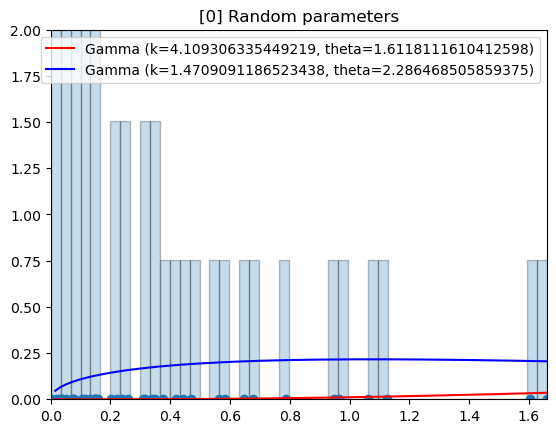

/tmp/ipykernel_115400/4205042458.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  a = -1*(k_n*torch.log(torch.tensor(gamma(k_n)*theta_n)))
/tmp/ipykernel_115400/1588006157.py:21: UserWarning: var(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1760.)
  k_1 = torch.mean(k1_tentative_values)**2 / torch.var(k1_tentative_values)
/tmp/ipykernel_115400/1588006157.py:23: UserWarning: var(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1760.)
  theta_1 = torch.var(k1_tentative_values)/ torch.mean(k1_tentative_values)


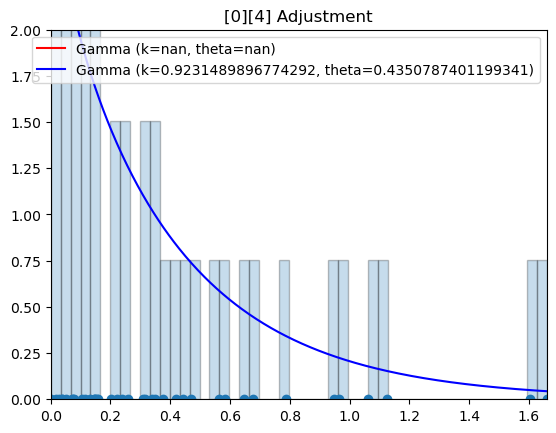

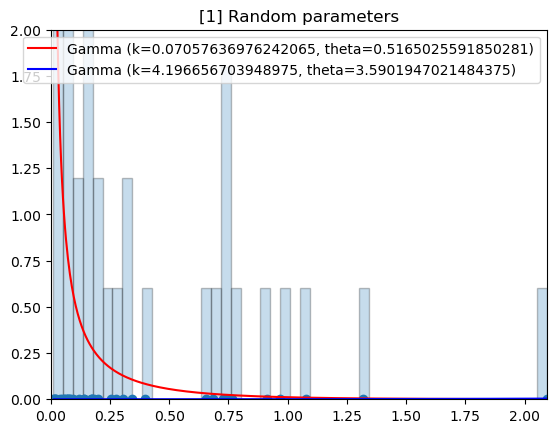

/tmp/ipykernel_115400/1588006157.py:22: UserWarning: var(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1760.)
  k_2 = torch.mean(k2_tentative_values)**2 / torch.var(k2_tentative_values)
/tmp/ipykernel_115400/1588006157.py:24: UserWarning: var(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1760.)
  theta_2 = torch.var(k2_tentative_values)/ torch.mean(k2_tentative_values)


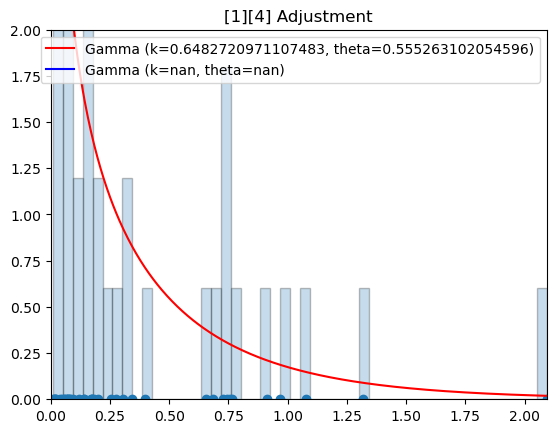

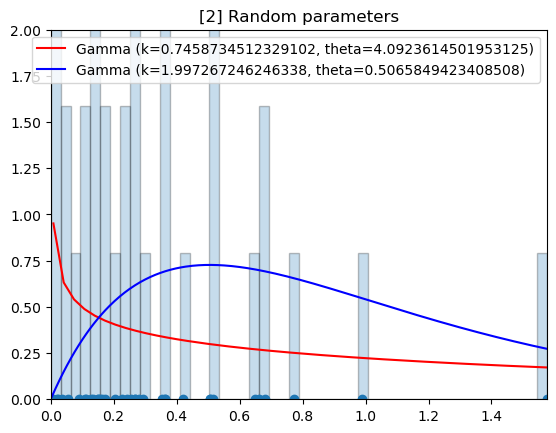

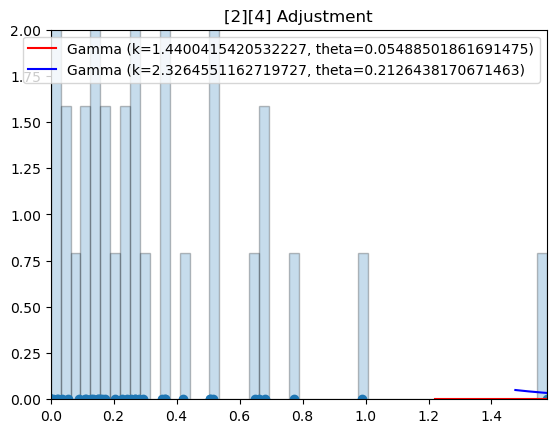

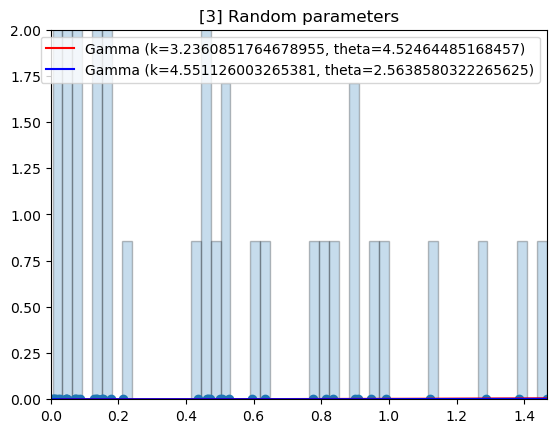

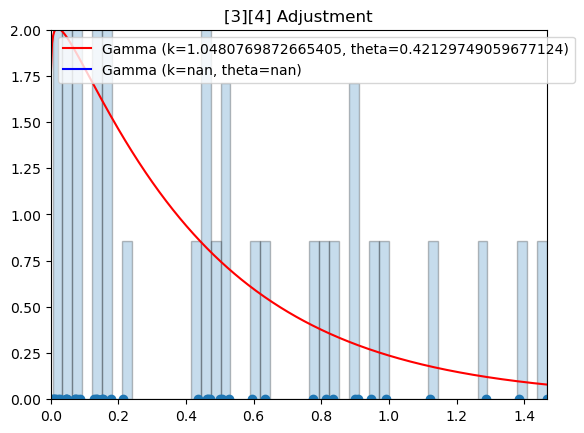

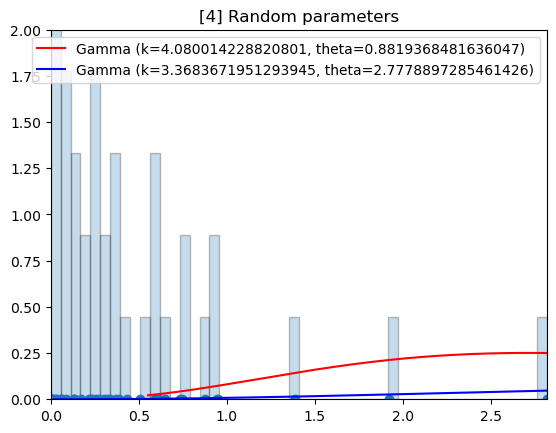

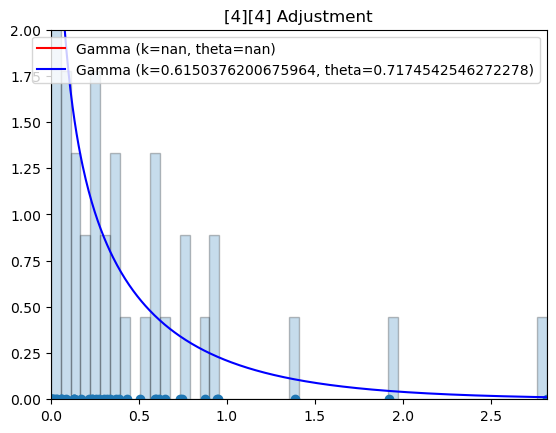

In [41]:
for i in range(i_max):
    X = generate_gamma_data(n, k1, theta1, k2, theta2)
    #P = random_parameters_heuristic(X)
    # params must be positive.
    P = init_random_parameters()
    plot_gamma(X, P[0][0], P[0][1], P[1][0], P[1][1], '[{}] Random parameters'.format(i))

    for a in range(i_adj_max):
        M = calculate_membership_dataset_gamma(X, P)

        #print('[', i,'] Old P parameters: ', P)
        P = recalculate_parameters_gamma(X, M)
        #print('[', i,'] New P parameters: ', P, '\n')
    plot_gamma(X, P[0][0], P[0][1], P[1][0], P[1][1], '[{}][{}] Adjustment'.format(i, a))